In [1]:
# problem statement :  Build a machine learning model to classify Iris flowers into one of the three species 
#(Iris setosa, Iris virginica, or Iris versicolor) based on their sepal and petal measurements.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
iris = datasets.load_iris()
x = iris.data  # Features
y = iris.target  # Target labels

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
x_train

array([[5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2

In [14]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [24]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
x_train

array([[-0.4134164 , -1.46200287, -0.09951105, -0.32339776],
       [ 0.55122187, -0.50256349,  0.71770262,  0.35303182],
       [ 0.67180165,  0.21701605,  0.95119225,  0.75888956],
       [ 0.91296121, -0.02284379,  0.30909579,  0.2177459 ],
       [ 1.63643991,  1.41631528,  1.30142668,  1.70589097],
       [-0.17225683, -0.26270364,  0.19235097,  0.08245999],
       [ 2.11875905, -0.02284379,  1.59328871,  1.16474731],
       [-0.29283662, -0.02284379,  0.36746819,  0.35303182],
       [-0.89573553,  1.17645543, -1.44207638, -1.40568508],
       [ 2.23933883, -0.50256349,  1.65166111,  1.0294614 ],
       [-0.05167705, -0.74242333,  0.13397857, -0.32339776],
       [-0.77515575,  0.93659559, -1.44207638, -1.40568508],
       [-1.01631531,  1.17645543, -1.50044878, -1.27039917],
       [-0.89573553,  1.89603497, -1.15021435, -1.13511325],
       [-1.01631531, -2.42144225, -0.21625586, -0.32339776],
       [ 0.55122187, -0.74242333,  0.60095781,  0.75888956],
       [-1.25747488,  0.

In [27]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(x_test)

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

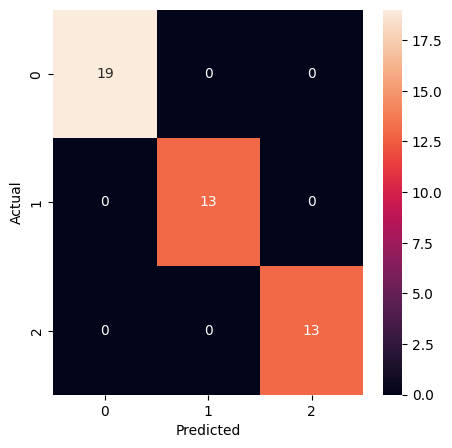

In [32]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [33]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

